# [Topic Modeling](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [1]:

from pprint import pprint
import numpy as np
np.random.seed(2018)
import nltk

# reload only imported modules before run
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

'''
pantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
standford source: https://nlp.stanford.edu/software/CRF-NER.shtml
standford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp
'''

'\npantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html\nstandford source: https://nlp.stanford.edu/software/CRF-NER.shtml\nstandford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp\n'

### constants

In [2]:
start_date = '01-11-2018' #  09-Sep-2018 
end_date = '30-12-2018' # 01-Oct-2018

### We will perform the following steps:

#### 1. Tokenization: 
Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [3]:
# def tokenize(text):
#     return gensim.utils.simple_preprocess(text)

#### 2. Remove small words:
Words that have fewer than 3 characters are removed.

In [4]:
# def isShortWord(token):
#     return len(token) < 3

#### 3. Remove stopwords:
All stopwords are removed.

In [5]:
# def isStopWord(token):
#     return token in gensim.parsing.preprocessing.STOPWORDS

#### 4. lemmatized +  Stemming:
Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [6]:
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag, word_tokenize
# from nltk.stem.porter import *
# from textblob import TextBlob


# def lemmatize_stemming(token):
#     stemmer = PorterStemmer() #gensim.parsing.stem_text(tokenize) #
#     for word, tag in pos_tag(word_tokenize(token)):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = WordNetLemmatizer().lemmatize(word, wntag) if wntag else word
#         return TextBlob(lemma).words[0].singularize()
#     return ''

#### 5. Replace Emojis:

In [7]:
# ## get emoji characters file path
# def getEmojis():
#     from dataSource import getEmojis
#     comments_file_path = getDataSourcePathFor(emoji_path)
#     return getEmojis(comments_file_path)#.head()

In [8]:
# def hasEmojicon(token):
    
# def replaceEmojicons(token, emojies):
#     pass
    

## Data Source

In [9]:
# def getNounList(sentence='', tokens = []):
#     from nltk import word_tokenize, pos_tag
#     if len(tokens) > 0:    
#         nouns = [token for token, pos in pos_tag(tokens) if pos.startswith('NN')]
#         return nouns
#     else:
#         nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('NN')]
#         return nouns

In [10]:
# text = 'I Have done reviewing, Will be seeing by them'
# print(preprocess(text))

In [11]:
# key is file storage path
# def getDataSourcePathFor(keyForFilePath):
#     import json
#     import os
    
#     config_file_path = os.environ[virtual_env] + '/config.json'

#     with open(config_file_path) as f:
#         config = json.load(f)
#         if keyForFilePath in config:# ['comments_path', 'output_path']
#             return config[keyForFilePath] 
#     return None

In [12]:
# ## get list of comments from stored input csv file
# import dataSource 

# def getListOfComments():
#     ### This is to get csv rows between given dates
#     comments_file_path = getDataSourcePathFor(comments_path)
#     commentsList = getComments(comments_file_path, start_date, end_date) #['comments'] 
#     commentsList = commentsList.sort_values(by='ratings', ascending=True)['comments'] 
#     print('Total number of comments: %s between %s and %s' % (len(commentsList), start_date, end_date))
#     return commentsList

### Text processing

In [13]:
# import re

# def filterWord(token):
#     if not (isStopWord(token) or isShortWord(token)):
#         lemmaWord = lemmatize_stemming(token)
#         if not isShortWord(lemmaWord):
#             return ("".join(re.findall("[a-zA-Z]+", lemmaWord)).lower())
#     return None 
    
# def filters(sentence):
# #     print('..given comments:', sentence)
#     result = []
#     #nouns = getNounList(sentence) # fetch only Nouns
#     for token in tokenize(sentence):#nouns: ###tokenize(text):
#         result.append(filterWord(token))
#     return result

# def filterWords(tokens):
#     return list(filter(lambda token: filterWord(token), tokens))

In [14]:
# def preprocessCommentDocument(document):
#     return list(map(lambda sentence: filters(sentence), document))

### Word Cloud

In [15]:
from wordCloud import showWordCloud
def showCloud(topicCollection):
    showWordCloud(topicCollection) 

### Bag of Words on the Data set

In [16]:
def bow(processed_docs):
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    return bow_corpus

### Sentiment

In [17]:
from getSentiment import getSentiment

def getSentFromCommentList(commentList):
    sentimentList = []
    for sentence in commentList:
        sentiment = getSentiment(sentence)
        sentimentList.append(sentiment)
    return sentimentList


def isNegative(sentiment):
    return sentiment > 0.5


def tokenDictWithPosNegSentiment(sentimentList, document):
    sentDict = {}
    size = range(len(document))
    
    for i in size:
        for token in document[i]:
            v = (0, 0, 0) # (neg, pos, freq)
            if token in sentDict:
                v = sentDict[token]
                
            if isNegative(sentimentList[i]):
                v = (v[0]+1, v[1], v[2]+1)
            else:
                v = (v[0], v[1]+1, v[2]+1)
            sentDict[token] = v
    sentDict.pop('', None)
    return sentDict 

### Main()

In [18]:
import SDataSource
import SConstants
from SWordList import SWordList
from sUtility import SUtility
from sPreprocessor import SPreprocessor


In [52]:
sutility = SUtility()
spreprocessor = SPreprocessor()

# SPreprocessor.resolveDependancy(trieCommon)
dateBetween = [start_date, end_date]
commentsDocument = SDataSource.getListOfComments(dateBetween)#.head(1000)
print('filtered comments: ', len(commentsDocument))
# document preprocessing, cleaning, filtering, replacement, spliting into multiple senetnces from one
processed_doc = []
for sentence in commentsDocument:
    for each in spreprocessor.docCleaning(sentence):
        processed_doc.append(each)


Total number of comments: 972 between 01-11-2018 and 30-12-2018
filtered comments:  972


In [53]:
def makeDict(sentence):
    t = spreprocessor.parseToTokens(trieTopic, sentence)
    r = spreprocessor.parseToTokens(trieNReason, sentence)
    print(sentence)
    print('topic is:', t)
    print('reasons are:', r)
    print()
    sutility.dump(t, r)

In [54]:
wordList_file = SDataSource.getDataSourcePathFor(SConstants.wordFile_path)
trieCommon = SWordList(wordList_file)

topic_file = SDataSource.getDataSourcePathFor(SConstants.topic_path)
trieTopic = SWordList(topic_file)

n_reason_file = SDataSource.getDataSourcePathFor(SConstants.n_reason_path)
trieNReason = SWordList(n_reason_file)

..SWordList constructor called 
..SWordList constructor called 
..SWordList constructor called 


In [55]:
l = ['crashing', 'changes', 'upi', 'biometric']
print(spreprocessor.filterWords(l))
    

['crash', 'chang', 'upi', 'biometr']


In [56]:
for each in processed_doc:
    makeDict(each)

i am cant add amount from another upi acoount or also cant transfer from another banks account it shows me benificary account is inactive or major problem not setup a upi id
topic is: ['upi', 'account']
reasons are: ['add amount', 'transfer', 'inact', 'problem']

now i am facing another problemi cant login dont know why solve the problem as soon as possible
topic is: ['login']
reasons are: ['face', 'problem']

the lastest update broke the app
topic is: ['updat', 'app']
reasons are: ['broke']

kya yr debit card se funds load nai kar sakte ismekoi kaam ka nai hai ye bank fir
topic is: ['debit card']
reasons are: []

sir app is not open and ifsc of most of the bank dont reflect it was my favorite app but not now
topic is: ['app', 'ifsc']
reasons are: ['open', 'reflect']

hating your services your technical issues were dont ending  highly absence of technological advances now required to stop your services immediately not qualified for asia best bank where as must be qualified for asia wor

previous app was excellent not happy with latest app
topic is: ['app']
reasons are: []

i am facing the problem with upi i have created two vpa but this app is asking me to create again and again please look into this matter
topic is: ['upi', 'app', 'look']
reasons are: ['face', 'problem']

add fund debit card option not available we need this option
topic is: ['debit card']
reasons are: []

correct password but still cant login
topic is: ['login']
reasons are: []

after updating my mobile no i cannot link other bank it says cannot register my mobile no pls solve it
topic is: []
reasons are: []

now it is not good
topic is: []
reasons are: []

i tried transfer amount to my account its not working
topic is: ['account']
reasons are: ['transfer', 'not working']

pathetici have downloading and removing ur app for long timewen i don want ur paywave debit cardwhy r u forcing me on appas such ur network in india is bad
topic is: ['app']
reasons are: ['forc', 'bad']

ur competition is gonna ki

topic is: ['app']
reasons are: []

app takes too much time to loadits too slow and always crash and everytime i hve to verify to open kindly optimize and make it fastoverall excellent app kindly add transaction history in simple interface with full transaction detail so that easy to take screenshot and add share option
topic is: ['app']
reasons are: ['open']

it keeps registering the same device every few days as a new one send sms again and again customer care had assured that its a technical issue and will be sorted out soon but it continues have to register the device again each time i try to login very frustrating now it is not working at all not login in
topic is: ['customer care', 'login']
reasons are: ['frustrat', 'not working']

easier way to transfer money
topic is: []
reasons are: ['transfer']

the banking facilities are good but the app is worstthe web version is still better and fast
topic is: ['app', 'version']
reasons are: []

hi i used digibank account my frnd all get lo

reasons are: ['chang', 'servic']

application works good
topic is: []
reasons are: []

good app easy ui but inbuilt fingerprint scanner wont work in this app
topic is: ['app']
reasons are: []

cant add money through debit card please start this service again
topic is: ['debit card']
reasons are: ['servic']

good bank
topic is: []
reasons are: []

dg bank is good bat network slo
topic is: []
reasons are: []

nice app
topic is: ['app']
reasons are: []

great
topic is: []
reasons are: []

good app one app for all kind of transaction only problem is app is not too fast lags a lot
topic is: ['app']
reasons are: ['problem']

banking experience is good but apps is too much slow
topic is: []
reasons are: []

unable to login its showing not secure network
topic is: ['login']
reasons are: []

please provide cheque book
topic is: []
reasons are: []

how to apply dbs personal loanshow in apps
topic is: []
reasons are: []

thats good
topic is: []
reasons are: []

everything is good but the only pro

topic is: ['app']
reasons are: []

best bank ever period i dont know what else anyone could expect from a bank its perfect none of the other banks in india come close no charges high interests more security no spam msgs reliable app efficient customer service so many offers no minimum balance truly digital with no cash business hence no useless queues n stuff widely supported debit card fastest transfer of funds ive ever seeni just dont know why anyone would give it starthose ppl should stick with sbi or worst bank everaxis bankbanking has dont been so easier since i made an account here thanks for great yrs of servicewish it lasts way longer 
topic is: ['secur', 'app', 'customer service', 'offer', 'balanc', 'debit card', 'account']
reasons are: ['servic', 'transfer', 'worst bank']

very good online banking app but i m cant open my account because the bank say that i have already an account when i contact to costumer service they told me that your account was closed one year before ple

app not getting installed
topic is: ['app']
reasons are: []

good
topic is: []
reasons are: []

usefulness application
topic is: []
reasons are: []

very good serviced
topic is: []
reasons are: []

it is giving me libraries tempering error even when i dont have rooted device
topic is: []
reasons are: []

wonderful bank appbut fund from debit card option was removed is greatly disappointed it would be good if you add the option in future update
topic is: ['debit card', 'updat']
reasons are: []

rocking app
topic is: ['app']
reasons are: []

very best
topic is: []
reasons are: []

i have one doubt is this available netbanking in ur bank
topic is: []
reasons are: []

help my aadhar is allrady exait fix it
topic is: []
reasons are: ['fix it']

good
topic is: []
reasons are: []

good
topic is: []
reasons are: []

awesome application
topic is: []
reasons are: []

easy to use
topic is: []
reasons are: []

very very good
topic is: []
reasons are: []

gud
topic is: []
reasons are: []

one of th

topic: ('app', 190)
reasons [('open', 14), ('not working', 10), ('crash', 6), ('every time', 5), ('popup', 4), ('chang', 4), ('bad', 4), ('frustrat', 3), ('reset', 3), ('problem', 2), ('unstabl', 2), ('something went wrong', 2), ('suck', 2), ('stuck', 2), ('worst experience', 1), ('buggi', 1), ('incorrect', 1), ('reflect', 1), ('fix it', 1), ('forc', 1), ('transfer', 1), ('deposit', 1), ('screen', 1), ('servic', 1), ('stop', 1), ('broke', 1)]


/home/nawaz/.virtualenvs/AWSComp/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


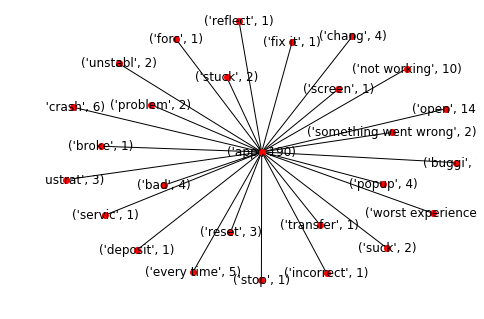

In [24]:
from sNetworkx import SNetworkx
snetworkx = SNetworkx()
t = sutility.getFamousTopics()[0]
r = sutility.getReasonDict()[0]
print('topic:', t)
print('reasons', r[1])
snetworkx.inputData(t, r[1])
snetworkx.show()

In [25]:
sutility.showTopicCounts()
print('---------------------------------')
sutility.showReasonDict()

[('app', 190), ('account', 77), ('login', 65), ('debit card', 45), ('updat', 42), ('upi', 32), ('version', 15), ('customer care', 14), ('atm', 8), ('customer service', 7), ('kyc', 7), ('look', 5), ('biometr', 4), ('balanc', 4), ('signup', 3), (None, 2), ('internet', 2), ('speed', 2), ('charg', 2), ('ifsc', 2), ('debit cards', 2), ('back option', 1), ('postal code', 1), ('international transactions', 1), ('another bank', 1), ('offer', 1), ('deals and offers', 1)]
---------------------------------
app
[('open', 14), ('not working', 10), ('crash', 6), ('every time', 5), ('popup', 4), ('chang', 4), ('bad', 4), ('frustrat', 3), ('reset', 3), ('problem', 2), ('unstabl', 2), ('something went wrong', 2), ('suck', 2), ('stuck', 2), ('worst experience', 1), ('buggi', 1), ('incorrect', 1), ('reflect', 1), ('fix it', 1), ('forc', 1), ('transfer', 1), ('deposit', 1), ('screen', 1), ('servic', 1), ('stop', 1), ('broke', 1)]

account
[('open', 18), ('transfer', 4), ('servic', 4), ('problem', 3), ('ba

In [26]:
sutility.showTopicCounts()
# sentList = commentsDocument.map()
# sentList = commentsDocument.map(getSentiment)

[('app', 190), ('account', 77), ('login', 65), ('debit card', 45), ('updat', 42), ('upi', 32), ('version', 15), ('customer care', 14), ('atm', 8), ('kyc', 7), ('customer service', 7), ('look', 5), ('balanc', 4), ('biometr', 4), ('signup', 3), ('charg', 2), (None, 2), ('debit cards', 2), ('internet', 2), ('speed', 2), ('ifsc', 2), ('postal code', 1), ('offer', 1), ('another bank', 1), ('international transactions', 1), ('deals and offers', 1), ('back option', 1)]


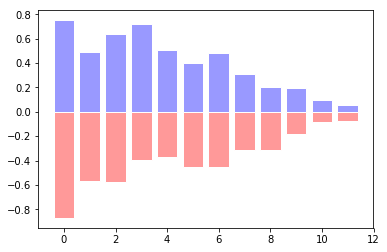

In [ ]:
from sGraph import makeHistogramkk
makeHistogram()

In [57]:
l = list(commentsDocument)
p = list(processed_doc)

length = len(l)

for i in range(length):
    print(l[i])
    print(p[i])
    print()

In [29]:
# dump = list(zip(commentsDocument, processed_doc))
# length = len(dump)
# for i in range(length):
#     print(dump[i][0])
#     print(dump[i][1])
# #     print(sentList.iloc[i])
#     print()

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_doc)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [ ]:
from gensim import corpora, models
corpus_tfidf = models.TfidfModel(bow_corpus)[bow_corpus]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# indexFor = 5
# print('..COMMENT :', commentsDocument[indexFor])
# print('\n..CORPOS :', processed_doc[indexFor])
# # print('\n..BOW:', bow_corpus[indexFor])
# for index, score in sorted(lda_model_tfidf[bow_corpus[indexFor]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [ ]:
topics = lda_model_tfidf.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
# print(processed_doc.values)

In [ ]:
l = tokenDictWithPosNegSentiment(list(sentList), list(processed_doc))


In [ ]:
# print(sortedMostPos(l))

In [ ]:
from showBarGraph import *
# show positive bar graph
showBarCharForSentiment(sortedMostPos(l), pos=True)

In [ ]:
# print(sortedMostNeg(l))
# show positive bar graph
showBarCharForSentiment(sortedMostNeg(l), pos=False)

In [ ]:
showPiChart(sortedMostFreq(l))

In [ ]:
# showTempBarChart()